In [38]:
import tde_analysis as td
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [39]:
import os
from early_tde_classification.config import Config

feat_path = os.path.join(Config.OUT_FEATURES_DIR, 'features_all.csv')
data, features = td.get_data(feat_path, cuts=True)
y = np.where(data['type']=='TDE', 1, 0)
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(features),
                                                    y, test_size=0.3, random_state=1)
clf = RandomForestClassifier(min_samples_leaf=.1, random_state=3, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=0.1,
                       random_state=3)

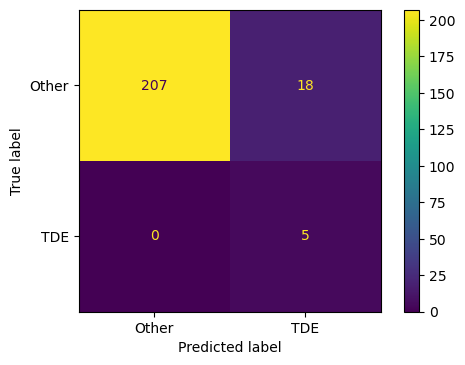

In [40]:
cm = confusion_matrix(y_test, clf.predict(X_test)) #, normalize='pred'

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Other', 'TDE']).plot()

In [19]:
print('Objects classified as TDEs:')
guess_TDE = data.iloc[(X_test[clf.predict(X_test)==1]).index]
guess_TDE[]

Objects classified as TDEs:


,objId,alertId,type,nb_points,norm,ref_time,amplitude,rise_time,temperature,r_chisq,...,err_rise_time,err_temperature,std_flux_g,std_flux_r,std_snr_g,std_snr_r,sigmoid_dist,snr_rise_time,snr_amplitude,data_origin
304,ZTF20abfcszi,ZTF20abfcszi-51,TDE,51.0,5009.352577,5.904035e+04,2.644240,17.451186,10829.352770,0.613425,...,2.057831,429.616898,0.218163,0.184846,4.415451,4.256497,1.379186,8.480378,8.988657,tdes_ztf
202,ZTF18absclqz,1309410943215010003,Unknown,8.0,95594.725735,2.459058e+06,2.048348,2.814653,10428.691398,37.243928,...,0.160532,391.205761,0.288187,0.187251,52.582923,8.845710,2.774732,17.533309,15.011294,extragal
283,ZTF20abqbzuv,1314255975815015004,Unknown,8.0,18938.378332,2.459069e+06,2.070389,2.421305,10197.033591,2.122012,...,0.211314,599.643565,0.325463,0.239384,6.561514,5.615665,3.818305,11.458354,14.106051,extragal
307,ZTF20acqoiyt,ZTF20acqoiyt-17,TDE,17.0,9308.660687,5.917571e+04,2.144322,5.065390,11879.451817,3.084463,...,0.496416,1019.075529,0.331158,0.201444,4.727574,2.159760,4.224956,10.203929,7.900369,tdes_ztf
12,ZTF20abhjwvh,1283187292115015004,Unknown,5.0,105227.104541,2.459027e+06,3.300350,1.983386,13209.853821,9.945101,...,0.080009,785.606693,0.192811,0.304355,3.366326,5.731192,5.524984,24.789623,8.758726,extragal
163,ZTF20abmudrv,1327461570915015005,Unknown,14.0,12436.125019,2.459055e+06,2.126587,2.283276,11010.964299,0.852667,...,0.107143,498.966120,0.378872,0.241341,8.050253,6.516492,5.198192,21.310586,14.856997,extragal
51,ZTF18abuktbs,1271319540215015003,Unknown,12.0,8080.368019,2.459022e+06,3.188354,13.437267,17672.350939,20.023393,...,2.732860,6068.916778,0.275567,0.216094,4.527316,2.797817,4.986562,4.916925,1.574664,extragal
16,ZTF20aboquuv,1321372175415015000,Early SN Ia candidate,30.0,12279.804196,2.459061e+06,2.026492,2.326778,10270.188974,1.012774,...,0.109111,358.796658,0.280223,0.156747,4.227758,3.240895,6.727563,21.324797,23.364741,extragal
177,ZTF20abgoocl,1270249613515015010,Unknown,18.0,4647.140273,2.459026e+06,2.313006,4.185055,11960.126715,0.404403,...,0.729793,886.989873,0.242633,0.239550,2.814705,4.087581,7.480637,5.734576,8.453981,extragal
161,ZTF20abjxwga,1324330215515015025,Ambiguous,8.0,7075.291109,2.459040e+06,2.276684,2.468674,11452.956398,1.245568,...,0.348940,701.282063,0.043374,0.214429,3.853675,5.806493,5.591540,7.074787,11.048306,extragal


In [101]:
print('Very good candidates (sharp cut):')
guess_TDE[guess_TDE['rise_time'] > 4]

Very good candidates (sharp cut):


,objId,alertId,type,nb_points,norm,ref_time,amplitude,rise_time,temperature,r_chisq,...,err_rise_time,err_temperature,std_flux_g,std_flux_r,std_snr_g,std_snr_r,sigmoid_dist,snr_rise_time,snr_amplitude,data_origin
304,ZTF20abfcszi,ZTF20abfcszi-51,TDE,51.0,5009.352577,5.904035e+04,2.644240,17.451186,10829.352770,0.613425,...,2.057831,429.616898,0.218163,0.184846,4.415451,4.256497,1.379186,8.480378,8.988657,tdes_ztf
307,ZTF20acqoiyt,ZTF20acqoiyt-17,TDE,17.0,9308.660687,5.917571e+04,2.144322,5.065390,11879.451817,3.084463,...,0.496416,1019.075529,0.331158,0.201444,4.727574,2.159760,4.224956,10.203929,7.900369,tdes_ztf
51,ZTF18abuktbs,1271319540215015003,Unknown,12.0,8080.368019,2.459022e+06,3.188354,13.437267,17672.350939,20.023393,...,2.732860,6068.916778,0.275567,0.216094,4.527316,2.797817,4.986562,4.916925,1.574664,extragal
177,ZTF20abgoocl,1270249613515015010,Unknown,18.0,4647.140273,2.459026e+06,2.313006,4.185055,11960.126715,0.404403,...,0.729793,886.989873,0.242633,0.239550,2.814705,4.087581,7.480637,5.734576,8.453981,extragal
112,ZTF20ablnjvp,1290230744115015000,SN candidate,9.0,7461.695617,2.459049e+06,3.208086,4.034098,13526.455580,0.034044,...,0.522716,1609.539389,0.285206,0.256338,3.218616,3.680714,3.647412,7.717573,4.430761,extragal
